# Business Case: Based on the given features we need to predict the flight ticket price.

In [108]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [109]:
data=pd.read_excel("Flight_Fare.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Domain Analysis:

#### 1) Airlines:
An organization providing a regular public service of air transport on one or more routes.The service enables travellers to search the flight schedules of multiple airlines.This column contains all the types of airlines like Indigo, Jet Airways, Air India, and many more.

#### 2) Date_of_Journey:
This column will let us know about the date on which the passenger’s journey will start. 

#### 3) Source:
This column holds the name of the place from where the passenger’s journey will start.

#### 4) Destination:
This column contains the name of the place to where passengers wanted to travel.

#### 5) Route:
In this column we can know about what the route is through which passengers have opted to travel from his/her source to their destination.

#### 6) Dep_Time:
The Time when the plane leaves the airport.

#### 7) Arrival_Time:
Arrival time is when the passenger will reach his/her destination.

#### 8) Duration:
Duration is the whole period that a flight will take to complete its journey from source to destination.

#### 9) Total_Stops:
This feature will let us know in how many places flights will stop between the source and destination in the whole journey.

#### 10) Additional_Info: 
In this column, we will get information about food, kind of food, and other amenities.

#### 11) Price: 
Price of the flight for a complete journey including all the expenses before onboarding.

## Basic Checks

In [110]:
#Getting the first five rows
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [111]:
#Getting the last five rows
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [112]:
data.shape

(10683, 11)

In [113]:
#Used to view some basic statistical details like percentile,mean,std etc.
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [114]:
#It will give you info about categorical data/columns
data.describe(include = ['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [115]:
#To check data type and null values for all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [116]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Exploratory Data Analysis

## Univariate Analysis

**Categorical data :**
- Airline, Source, Destination, Route, Additional_Info.

**Numerical data :**
- Date_of_Journey, Dep_Time, Arrival_Time, Duration, Total_Stops.

## Categorical data:

### Bar chart showing top 10 most preferred Airlines

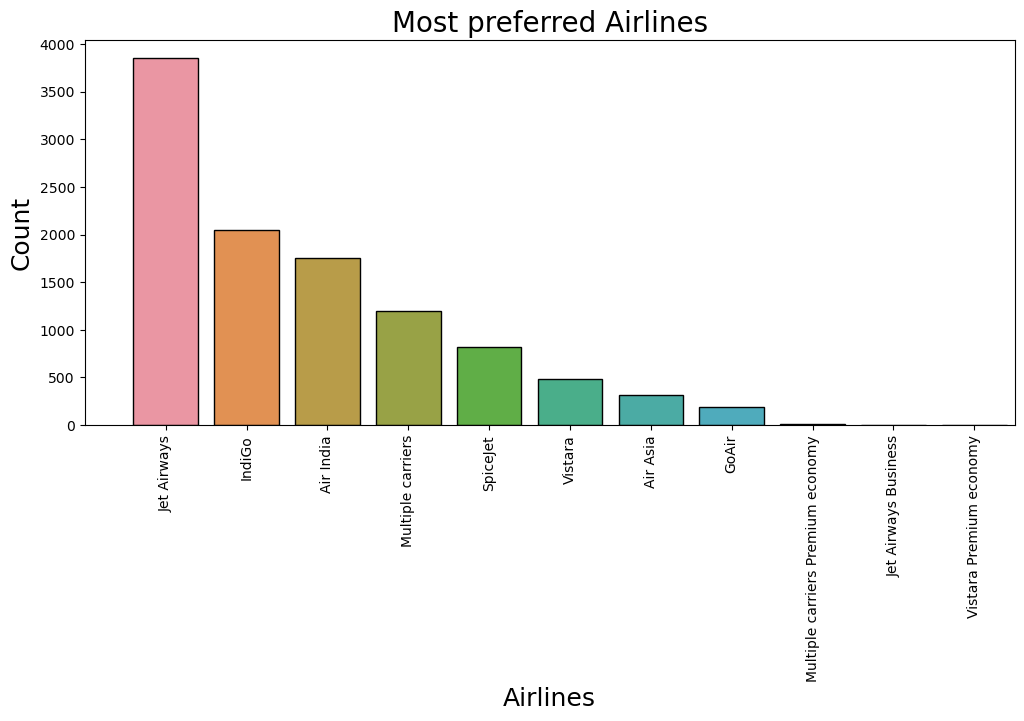

In [117]:
plt.figure(figsize = (12, 5))
sns.countplot(x = 'Airline', data = data, order = data['Airline'].value_counts().index, ec = 'black')
plt.title('Most preferred Airlines', fontsize = 20, color = 'black')
plt.xlabel('Airlines', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10.5)
plt.show()

## Insights

- The most preferred Airlines is Jet Airways.
- From all the total flight tickets sold,Jet Airways has the highest share followed by Indigo.
- The least preffered Airlines is Jet Airways Business and Vistara Premium economy.
- The count of the highest preferred Airline is 3850(approx).

### Bar chart showing the most preferred source

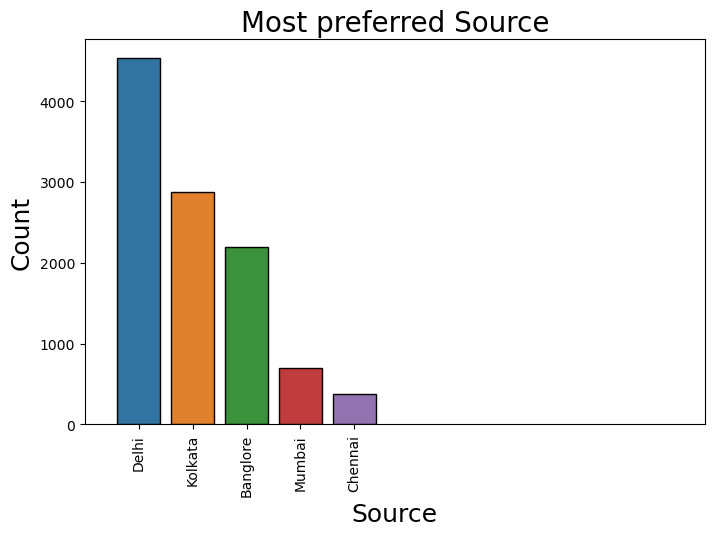

In [118]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Source', data = data, order = data['Source'].value_counts().index, ec = 'black')
plt.title('Most preferred Source',fontsize = 20, color = 'black') 
plt.xlabel('Source', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10.5)
plt.show()

## Insights

- This countplot explains about the most preferred source (i.e,) the name of the place from where most of the passenger’s journey will start.
- The most preferred Source is Delhi which has a count more than 4000.
- And the least one is Chennai.

### Bar chart showing the most preferred Destination

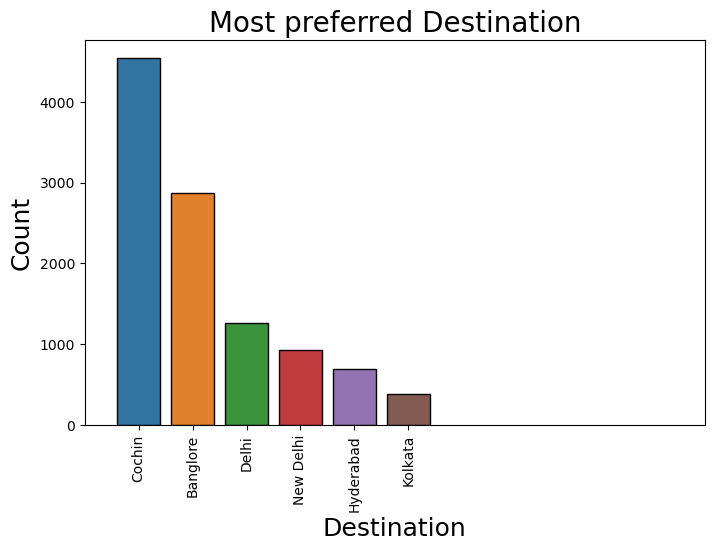

In [119]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'Destination', data = data, order = data['Destination'].value_counts().index, ec = 'black')
plt.title('Most preferred Destination', fontsize = 20, color = 'black')
plt.xlabel('Destination', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10.5)
plt.show()

## Insights


-  This countplot explains about the most preferred Destination (i.e,) the name of the place to where most of the passengers wanted to travel.
- The most preferred Destination is Cochin again which has counts more than 4000.
- And the least one is Kolkata.

### Bar chart showing top 30 most preferred Route

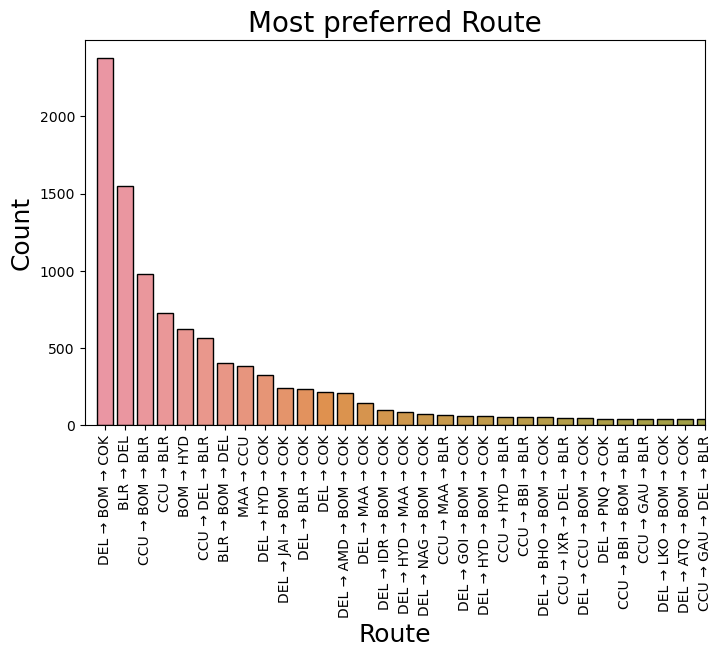

In [120]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Route', data = data, order = data['Route'].value_counts().index, ec = 'black')
plt.title('Most preferred Route', fontsize = 20, color = 'black')
plt.xlabel('Route', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 30)
plt.show()

## Insights

- The most preferred Route is DEL→BOM→COK.
- Followed by BLR→DEL

### Bar chart showing sbout the Additional_Info

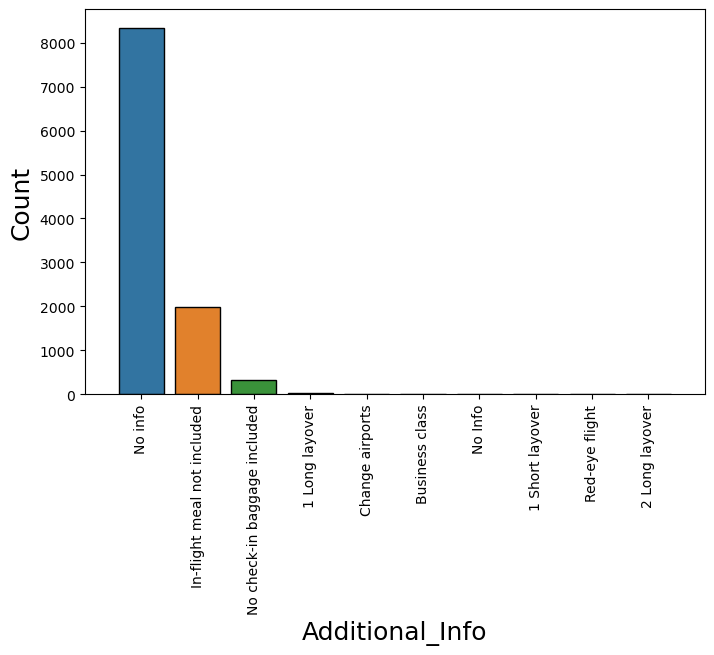

In [121]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Additional_Info', data = data, order = data['Additional_Info'].value_counts().index, ec = 'black')
plt.xlabel('Additional_Info', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)
plt.show()

## Insights


- In Additional_Info the highest count is 'No info'.
- And it is followed by In-flight meal not included.

## Numerical Data:

In [122]:
#Creating a new dataframe with numerical variables only
data1 = data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops']]
data1

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,non-stop
1,1/05/2019,05:50,13:15,7h 25m,2 stops
2,9/06/2019,09:25,04:25 10 Jun,19h,2 stops
3,12/05/2019,18:05,23:30,5h 25m,1 stop
4,01/03/2019,16:50,21:35,4h 45m,1 stop
...,...,...,...,...,...
10678,9/04/2019,19:55,22:25,2h 30m,non-stop
10679,27/04/2019,20:45,23:20,2h 35m,non-stop
10680,27/04/2019,08:20,11:20,3h,non-stop
10681,01/03/2019,11:30,14:10,2h 40m,non-stop


### Histplot showing about the Numerical data

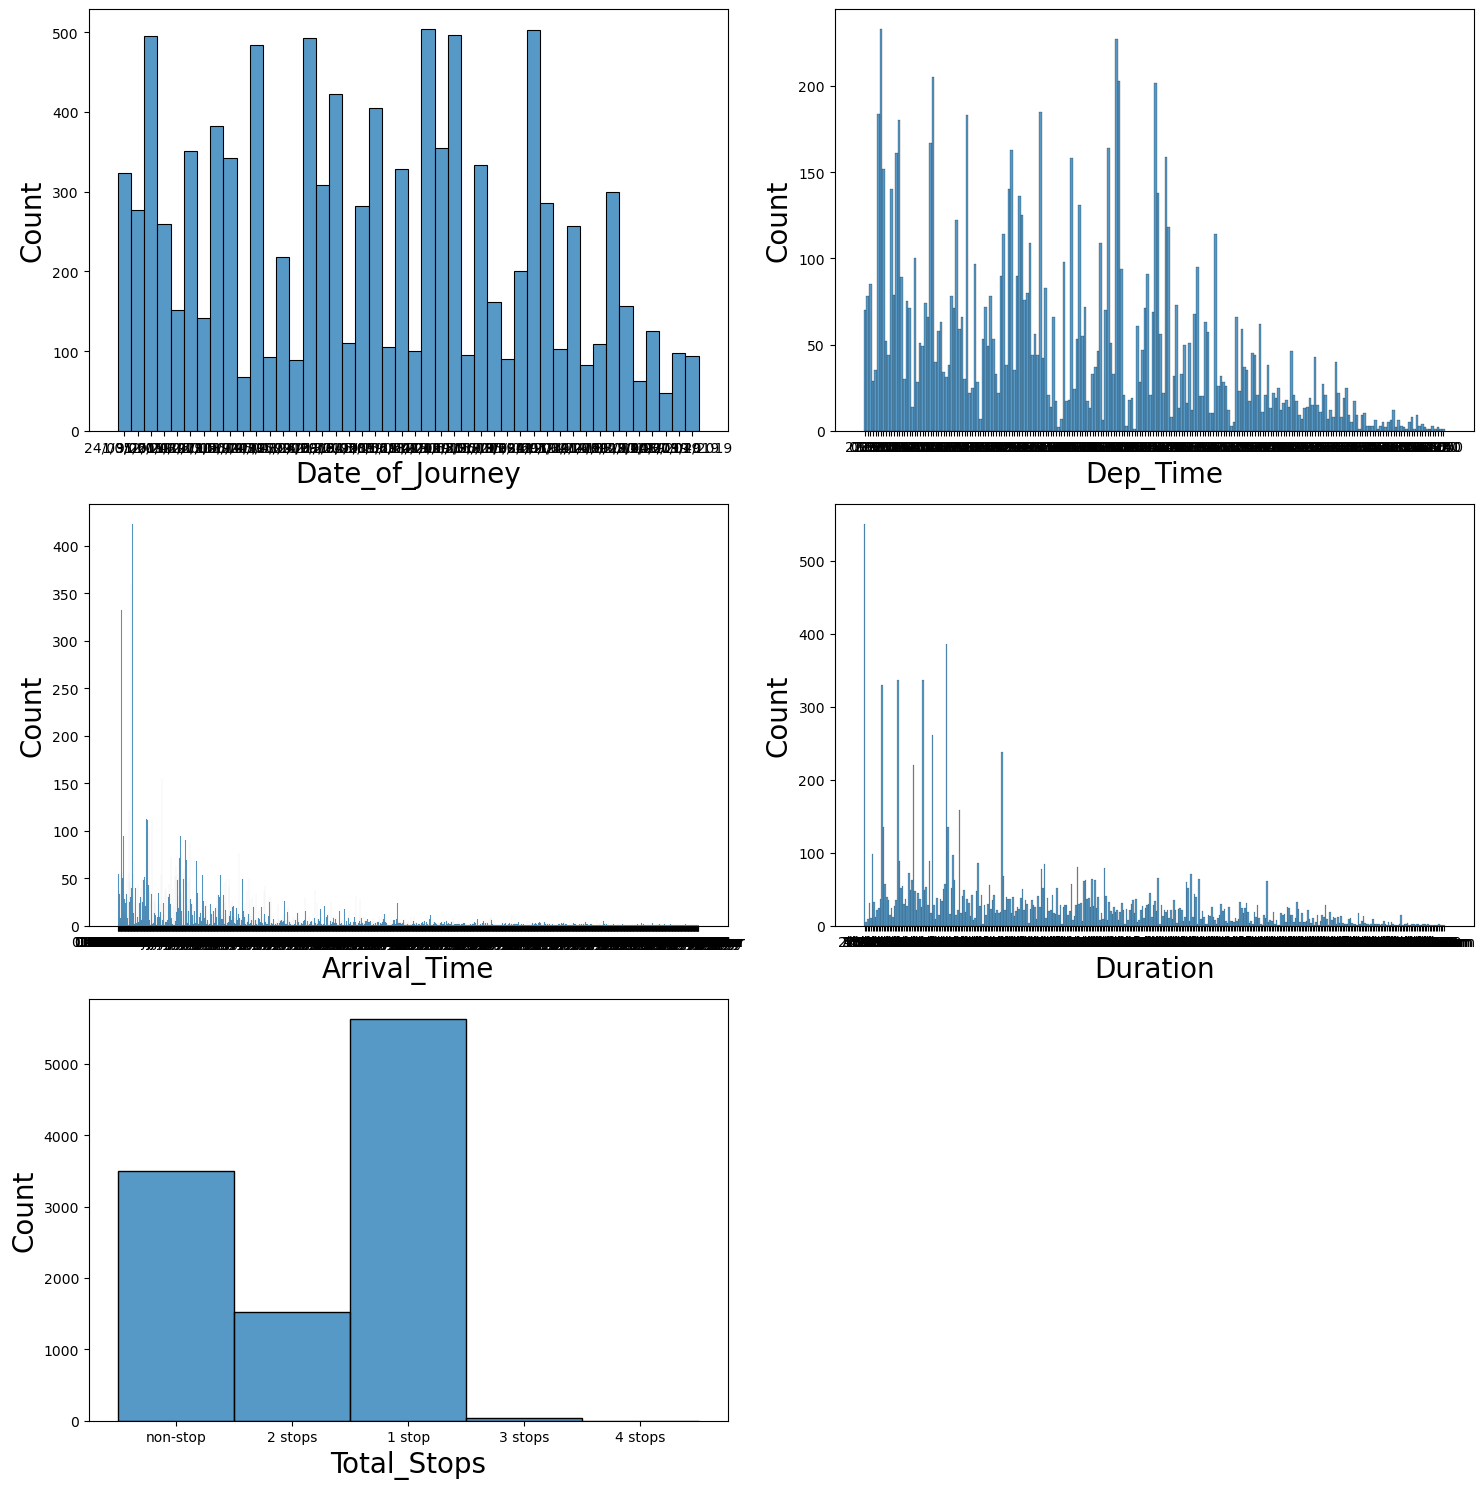

In [123]:
plt.figure(figsize = (15, 15))
plotnumber = 1

for i in data1:
    plt.subplot(3, 2, plotnumber)
    sns.histplot(data1[i])
    plt.xlabel(i, fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plotnumber = plotnumber + 1
plt.tight_layout()

## Insights

- As we observe the graphs the given dataset is large and it contains 10,683 rows.
- So Departure time, Arrival Time and Duration contains large number of unique values as each passengers travels in different time according to their preferences.
- Because of this the x labelling is getting overlapped and we are not getting the correct insights by this graph.
- Whereas the Date of journey and total stops have less unique value and the plotting becomes easier and we have obtained insights from those.

### Histplot showing about the Most preferred Date of Journey

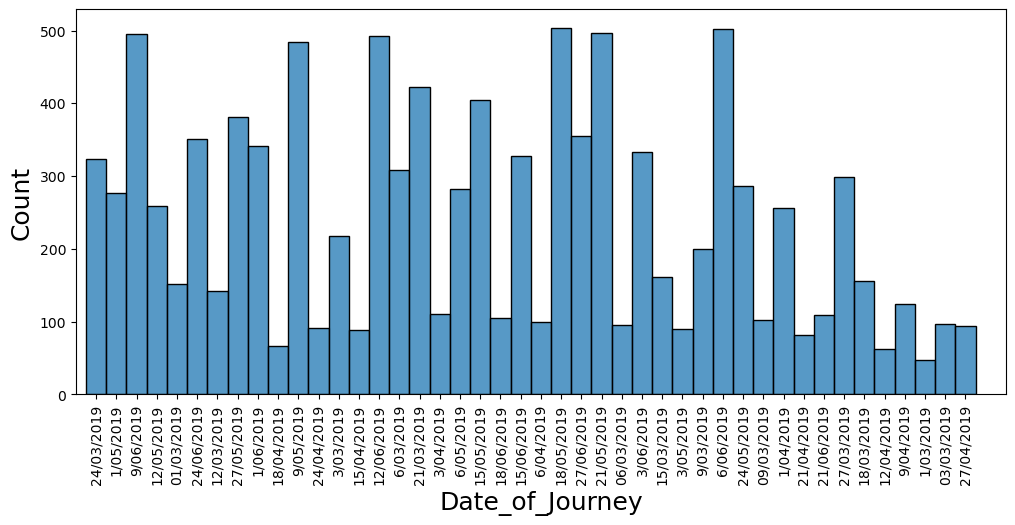

In [124]:
plt.figure(figsize = (12, 5))
sns.histplot(x = 'Date_of_Journey', data = data, ec = 'black')
plt.xlabel('Date_of_Journey', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 45)
plt.show()

## Insights

- The count of passengers travelling  at the date of 18/05/2019 and 6/06/2019 are approximately same are the highest.
- Followed by 21/05/2019, 9/06/2019 and 12/06/2019 approximately have the same count of passengers travelled in that date.
- The least count of passengers travelled is on 1/03/2019.

### Histplot showing about the count of the Total Stops


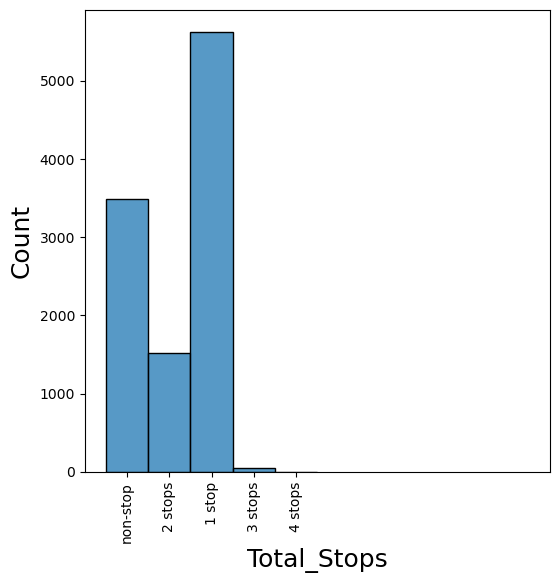

In [125]:
plt.figure(figsize = (6, 6))
sns.histplot(x = 'Total_Stops', data = data, ec = 'black')
plt.xlabel('Total_Stops', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)
plt.show()

## Insights


- The count of the 1 stop is the highest followed by non-stop.
- Passengers prefer non-stop because it saves time.
- But most preferred is 1 stop.
- The least count of total stops is 4 stops.

## Bivariate Analysis

### Airline Vs Flight Ticket Price

In [126]:
airlines = data.groupby('Airline').Price.max()
airlines_df = airlines.to_frame().sort_values('Price', ascending = False)
airlines_df

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


### Bar plot showing Airline company Vs Flight Ticket Price

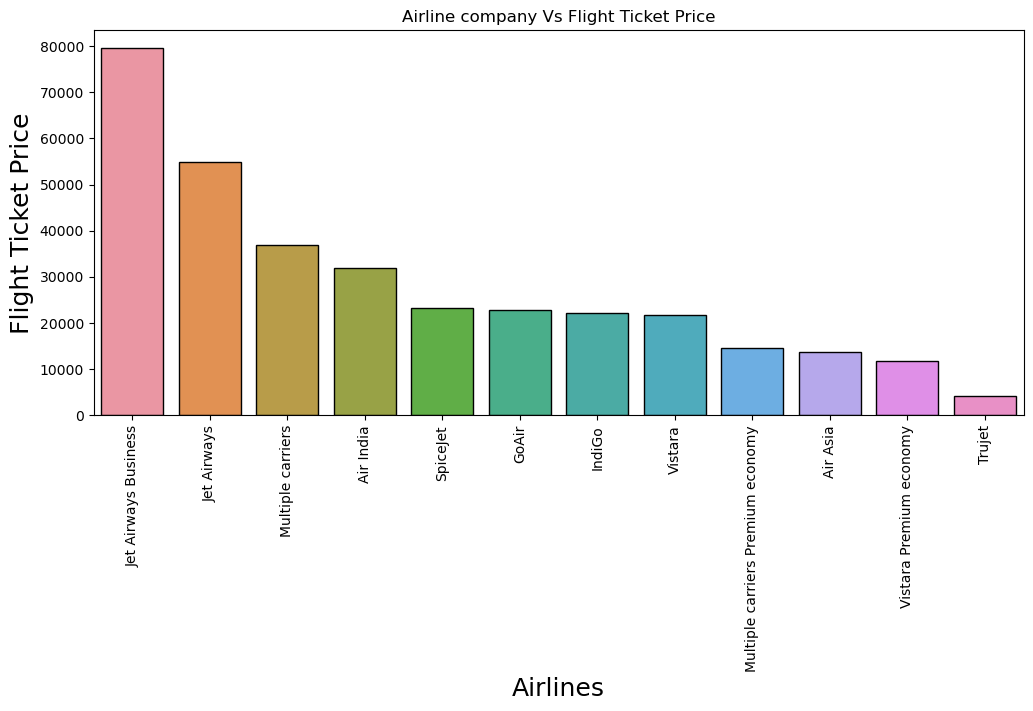

In [127]:
plt.subplots(figsize = (12, 5))
sns.barplot(x = airlines_df.index,y = airlines_df['Price'], ec = 'black')
plt.title('Airline company Vs Flight Ticket Price')
plt.xlabel('Airlines', fontsize = 18)
plt.ylabel('Flight Ticket Price', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

## Insights

- From the above graph we have observed that Jet Airways Business is the Costliest.
- And we have already seen that it is the least preferred Airlines.
- And it is followed by Jet Airways.
- The cheapest Airlines is Trujet and the price is 1759(approx).
- The costliest ticket price is 79,512.

In [128]:
data.Price.min()

1759

In [129]:
data.Price.max()

79512

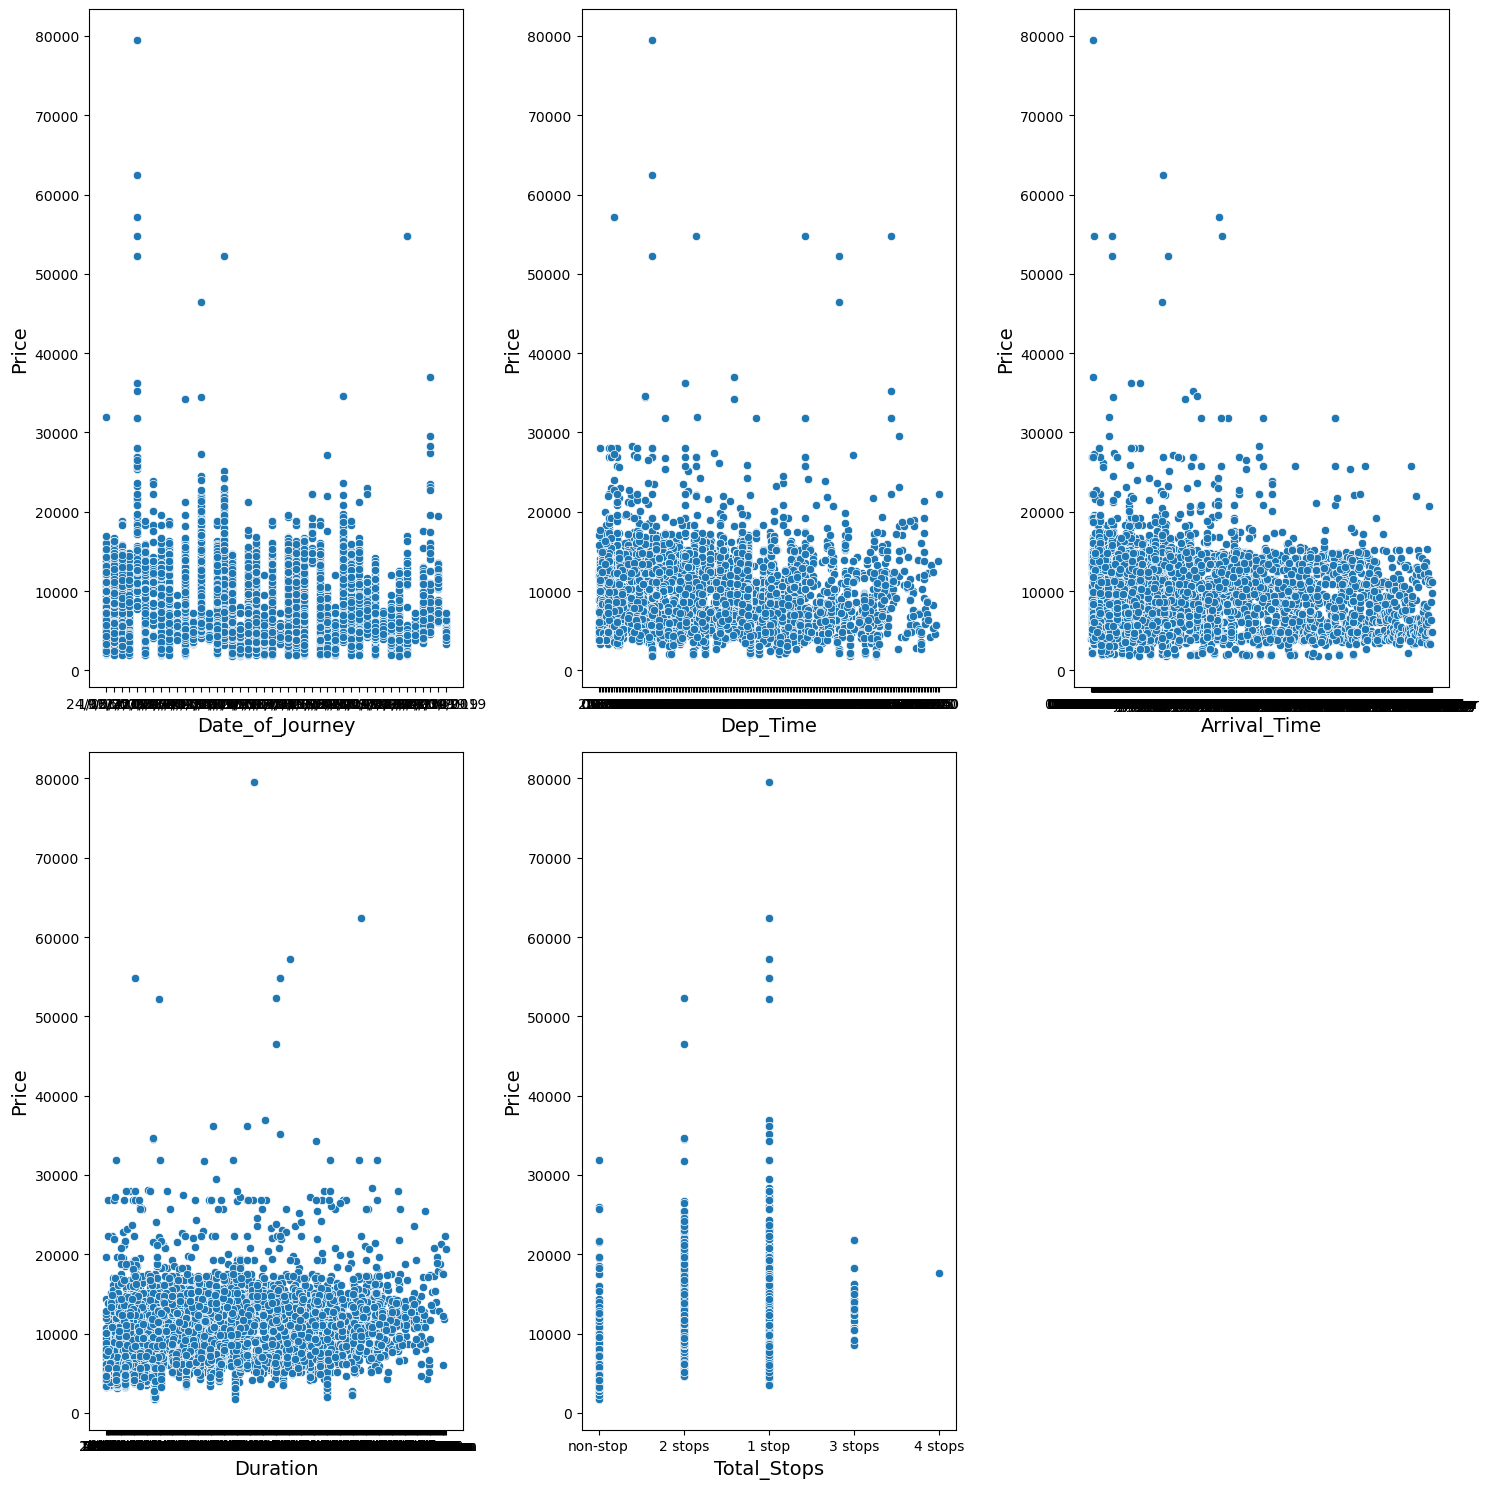

In [130]:
plt.figure(figsize = (15, 15))
plotnumber = 1

for i in data1:
    plt.subplot(2, 3, plotnumber)
    sns.scatterplot(x = data[i], y = data.Price)
    plt.xlabel(i, fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plotnumber = plotnumber + 1
plt.tight_layout()

## Insights


- No specific relation found.
- In Total stops we can observe 1 Stop has the highest ticket price.

### Price on Weekdays Vs Price on Weekends

In [131]:
days_df = data[['Airline', 'Date_of_Journey', 'Price']]
days_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897
1,Air India,1/05/2019,7662
2,Jet Airways,9/06/2019,13882
3,IndiGo,12/05/2019,6218
4,IndiGo,01/03/2019,13302


In [132]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'], format = '%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day:1 if day == 'Sunday' else 0)
days_df.head()

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0


### Barplot showing the Price on Weekdays Vs Weekends

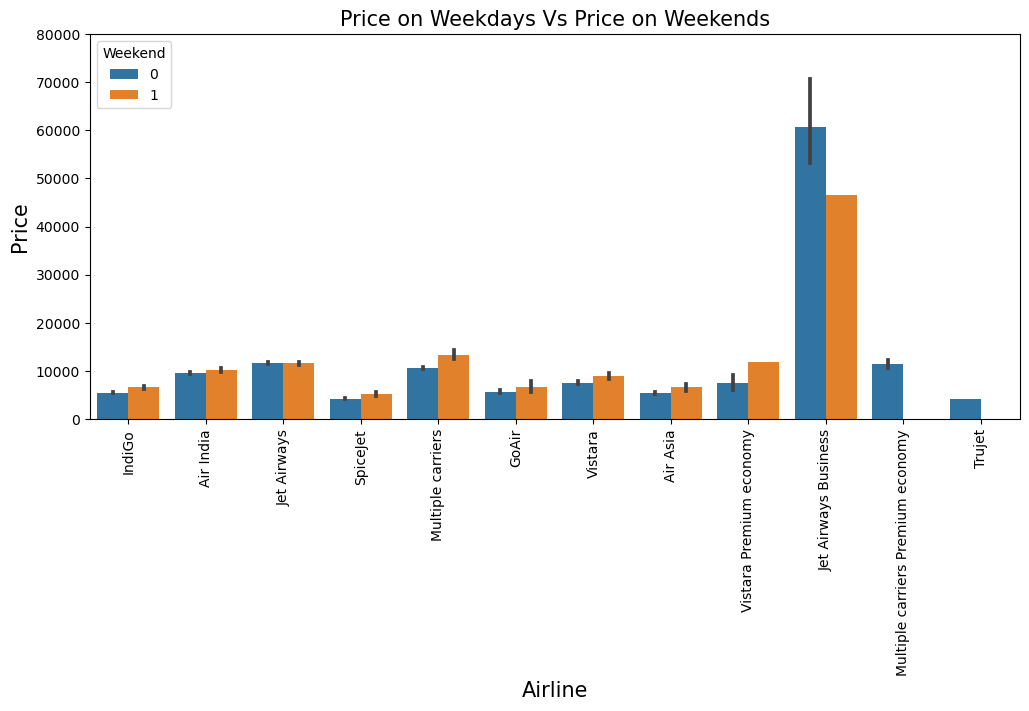

In [133]:
plt.subplots(figsize = (12, 5))
sns.barplot(x = 'Airline', data = days_df, y = 'Price', hue = 'Weekend')
plt.title('Price on Weekdays Vs Price on Weekends', fontsize = 15, color = 'black')
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylim(0, 80000)
plt.show()

## Insights

- As we can observe only Jet Airways Business, Multiple carriers premium economy and Trujet airlines have higher ticket Price on Weekdays and other airlines have higher ticket price on Weekend.
- We can conclude that the Price of tickets is higher on Weekends.

# Data Preprocessing

## Feature Engineering

In [134]:
#Extracting date, month and year from Date_of_Journey feature and store them in new columns.
data['Journey_date'] = data['Date_of_Journey'].str.split('/').str[0].astype(int)
data['Journey_month'] = data['Date_of_Journey'].str.split('/').str[1].astype(int)
data['Journey_year'] = data['Date_of_Journey'].str.split('/').str[2].astype(int)

In [135]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [136]:
#After Extracting Date_of_Journey is no longer needed as we have saved in new columns.
data = data.drop(['Date_of_Journey'], axis = 1)

In [137]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [138]:
data['Journey_year'].value_counts()

2019    10683
Name: Journey_year, dtype: int64

In [139]:
#Since Journey_year is same '2019' for all the rows it is the unique value and we can drop it
data = data.drop(['Journey_year'], axis = 1)

In [140]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [141]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [142]:
#Total_Stops
data['Total_Stops'] = data['Total_Stops'].str.split(' ').str[0]
data['Total_Stops'] = data['Total_Stops'].replace('non-stop','0')

In [143]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3


In [144]:
#Extracting hours and minutes from the Arrival_Time
data['Arrival_Time'] = data['Arrival_Time'].str.split(' ').str[0]
data['Arrival_hour'] = data['Arrival_Time'].str.split(':').str[0].astype(int)
data['Arrival_min'] = data['Arrival_Time'].str.split(':').str[1].astype(int)
data = data.drop(['Arrival_Time'], axis = 1)

In [145]:
#Extracting hours and minutes from the Departure_Time
data['Dep_Time'] = data['Dep_Time'].str.split(' ').str[0]
data['Dep_hour'] = data['Dep_Time'].str.split(':').str[0].astype(int)
data['Dep_min'] = data['Dep_Time'].str.split(':').str[1].astype(int)
data = data.drop(['Dep_Time'], axis = 1)

In [146]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,21,35,16,50


In [147]:
data.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

### Route Column

- The Route column tells about the journey's path.
- Route column can be removed because Total_Stops feature already captured this values and both are related.
- Additional_info can also be dropped since more that 70% have no-info.

In [148]:
data.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [149]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50


### Duration column

- Extract hours and min from the Duration feature.
- convert hours to minute and find the total duration in minutes and make it a separate column.

In [150]:
data['Duration_hr'] = data['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [151]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4


In [152]:
data['Duration_min'] = data['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [153]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4,45


In [154]:
data['Duration_min'].fillna('0', inplace = True)

In [155]:
data['Duration_hr'].str.contains('h').sum()

0

In [156]:
data['Duration_hr'].str.contains('m').sum()

1

In [157]:
data['Duration_min'].str.contains('h').sum()

0

In [158]:
data['Duration_min'].str.contains('m').sum()

0

In [159]:
data[data['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,5m,2,17327,6,3,16,55,16,50,5m,0


In [160]:
data.loc[[6474], 'Duration_min']=data.loc[[6474], 'Duration_hr']
data.loc[data['Duration_min']=='5m', 'Duration_min']=5

In [161]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4,45


In [162]:
data['Duration_hr'] = data['Duration_hr'].replace('5m', '0')

In [163]:
data['Duration_hr'].str.contains('m').sum()

0

In [164]:
data[data['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min


In [165]:
data['Duration_hr'] = data['Duration_hr'].astype(int)

In [166]:
data['Duration_min'] = data['Duration_min'].astype(int)

In [167]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,21,35,16,50,4,45


In [168]:
data['Duration'] = (data['Duration_hr'] * 60) + (data['Duration_min'])
data = data.drop(['Duration_hr', 'Duration_min'], axis = 1)

In [169]:
data.head(6475)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
6470,Multiple carriers Premium economy,Delhi,Cochin,725,1,9845,21,3,21,0,8,55
6471,IndiGo,Banglore,Delhi,165,0,4077,1,5,4,15,1,30
6472,Multiple carriers,Delhi,Cochin,690,1,9315,21,5,19,0,7,30
6473,Jet Airways,Kolkata,Banglore,570,1,14781,9,5,23,35,14,5


## Checking the null values

In [170]:
data.isnull().sum()

Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      1
Price            0
Journey_date     0
Journey_month    0
Arrival_hour     0
Arrival_min      0
Dep_hour         0
Dep_min          0
dtype: int64

In [171]:
data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [172]:
data.dtypes

Airline          object
Source           object
Destination      object
Duration          int32
Total_Stops      object
Price             int64
Journey_date      int32
Journey_month     int32
Arrival_hour      int32
Arrival_min       int32
Dep_hour          int32
Dep_min           int32
dtype: object

In [173]:
# '1' is most frequently occuring value, so fill Total_Stops column null values by 1
data['Total_Stops'] = data['Total_Stops'].fillna('1')

In [174]:
data['total_Stops'] = data['Total_Stops'].astype(int)

In [175]:
data.isnull().sum()

Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      0
Price            0
Journey_date     0
Journey_month    0
Arrival_hour     0
Arrival_min      0
Dep_hour         0
Dep_min          0
total_Stops      0
dtype: int64

## Converting the Categorical data into Numerical data

### Using Encoding to Handle the categorical data

**Features with categorical data**
- Airline
- Source
- Destination

Apply Lable Encoder to these features

In [176]:
for i in ['Airline', 'Source', 'Destination']:
    print(i, data[i].unique())
    print('-------------------------------------------------------------------')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
-------------------------------------------------------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
-------------------------------------------------------------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
-------------------------------------------------------------------


In [177]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Airline', 'Source', 'Destination']:
    data[i] = le.fit_transform(data[i])
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
0,3,0,5,170,0,3897,24,3,1,10,22,20,0
1,1,3,0,445,2,7662,1,5,13,15,5,50,2
2,4,2,1,1140,2,13882,9,6,4,25,9,25,2
3,3,3,0,325,1,6218,12,5,23,30,18,5,1
4,3,0,5,285,1,13302,1,3,21,35,16,50,1


In [178]:
data

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
0,3,0,5,170,0,3897,24,3,1,10,22,20,0
1,1,3,0,445,2,7662,1,5,13,15,5,50,2
2,4,2,1,1140,2,13882,9,6,4,25,9,25,2
3,3,3,0,325,1,6218,12,5,23,30,18,5,1
4,3,0,5,285,1,13302,1,3,21,35,16,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,4107,9,4,22,25,19,55,0
10679,1,3,0,155,0,4145,27,4,23,20,20,45,0
10680,4,0,2,180,0,7229,27,4,11,20,8,20,0
10681,10,0,5,160,0,12648,1,3,14,10,11,30,0


## Feature Selection

In [179]:
data.corr()

,Airline,Source,Destination,Duration,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
Airline,1.000000,-0.013401,0.018479,-0.159803,-0.039520,0.026238,0.024643,-0.007491,-0.071089,-0.035194,-0.060044,-0.199411
Source,-0.013401,1.000000,-0.592574,0.161874,0.015998,0.004898,0.183268,0.025632,0.021040,0.059044,-0.056991,0.192840
Destination,0.018479,-0.592574,1.000000,-0.257365,-0.071112,-0.040998,-0.364686,-0.039710,0.017196,-0.072979,0.127892,-0.295481
Duration,-0.159803,0.161874,-0.257365,1.000000,0.506371,-0.022562,0.014870,0.051434,-0.069653,0.002001,-0.018938,0.738025
Price,-0.039520,0.015998,-0.071112,0.506371,1.000000,-0.153738,-0.103651,0.024264,-0.086155,0.006819,-0.024492,0.603883
Journey_date,0.026238,0.004898,-0.040998,-0.022562,-0.153738,1.000000,-0.038378,-0.003192,-0.017511,0.002220,-0.008261,-0.009472
Journey_month,0.024643,0.183268,-0.364686,0.014870,-0.103651,-0.038378,1.000000,-0.003941,-0.100626,0.039112,-0.059238,0.054389
Arrival_hour,-0.007491,0.025632,-0.039710,0.051434,0.024264,-0.003192,-0.003941,1.000000,-0.154362,0.005215,0.043054,0.038123
Arrival_min,-0.071089,0.021040,0.017196,-0.069653,-0.086155,-0.017511,-0.100626,-0.154362,1.000000,0.067909,-0.017594,-0.106939
Dep_hour,-0.035194,0.059044,-0.072979,0.002001,0.006819,0.002220,0.039112,0.005215,0.067909,1.000000,-0.024806,-0.061490


Text(0.5, 1.0, 'Heat map showing correlation between the features')

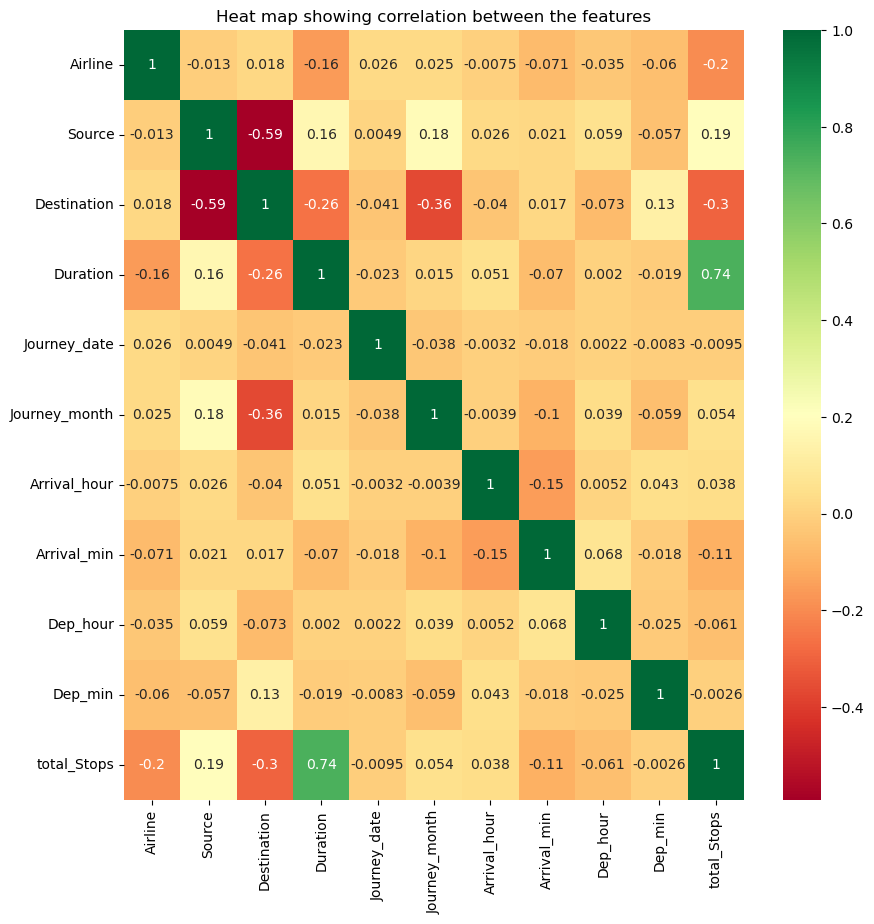

In [180]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.drop('Price', axis = 1).corr(), annot = True, cmap = 'RdYlGn')
plt.title("Heat map showing correlation between the features")

### There is no correlation between the features.


# 1) Linear Regression

- **Linear Regression** is a **supervised** machine learning.
- And it is a **regression** problem.

## Model Creation

In [181]:
## Creating the independent variable
x = data.drop('Price', axis = 1)
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
0,3,0,5,170,0,24,3,1,10,22,20,0
1,1,3,0,445,2,1,5,13,15,5,50,2
2,4,2,1,1140,2,9,6,4,25,9,25,2
3,3,3,0,325,1,12,5,23,30,18,5,1
4,3,0,5,285,1,1,3,21,35,16,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,9,4,22,25,19,55,0
10679,1,3,0,155,0,27,4,23,20,20,45,0
10680,4,0,2,180,0,27,4,11,20,8,20,0
10681,10,0,5,160,0,1,3,14,10,11,30,0


In [182]:
y = data.Price
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [184]:
x_train

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
752,3,2,1,300,1,27,5,21,0,16,0,1
7431,8,1,4,135,0,6,5,10,35,8,20,0
5478,4,3,0,1495,1,12,6,19,50,18,55,1
3445,4,2,1,1015,1,6,6,4,25,11,30,1
9380,4,0,2,180,0,18,6,10,10,7,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,4,2,1,1165,1,27,3,4,25,9,0,1
5191,4,3,0,400,1,9,5,20,45,14,5,1
5390,6,2,1,760,1,15,5,1,30,12,50,1
860,3,0,5,165,0,3,3,3,25,0,40,0


In [185]:
x_test

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
6076,4,3,0,750,1,18,5,18,15,5,45,1
3544,2,2,1,540,1,3,6,19,35,10,35,1
7313,4,3,0,345,1,1,5,19,50,14,5,1
5032,3,1,4,140,0,24,5,17,5,14,45,0
2483,4,2,1,335,1,21,5,4,25,22,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,4,0,5,365,1,18,3,23,0,16,55,1
8417,4,0,2,175,0,15,5,18,10,15,15,0
2605,3,0,2,170,0,21,6,3,15,0,25,0
1392,6,2,1,465,1,27,6,1,30,17,45,1


In [186]:
y_train

752      5054
7431     3911
5478    13044
3445    14714
9380     8016
        ...  
5734    12242
5191    10844
5390     7670
860      6144
7270    10262
Name: Price, Length: 8012, dtype: int64

In [187]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8012, 12)
(8012,)
(2671, 12)
(2671,)


In [188]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [189]:
y_pred = LR.predict(x_test)

In [190]:
y_pred

array([ 8583.40110813,  9099.91833772,  9813.54818242, ...,
        4133.32602861,  8156.25049488, 11446.05410901])

In [191]:
x_test

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
6076,4,3,0,750,1,18,5,18,15,5,45,1
3544,2,2,1,540,1,3,6,19,35,10,35,1
7313,4,3,0,345,1,1,5,19,50,14,5,1
5032,3,1,4,140,0,24,5,17,5,14,45,0
2483,4,2,1,335,1,21,5,4,25,22,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,4,0,5,365,1,18,3,23,0,16,55,1
8417,4,0,2,175,0,15,5,18,10,15,15,0
2605,3,0,2,170,0,21,6,3,15,0,25,0
1392,6,2,1,465,1,27,6,1,30,17,45,1


In [192]:
x_test

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
6076,4,3,0,750,1,18,5,18,15,5,45,1
3544,2,2,1,540,1,3,6,19,35,10,35,1
7313,4,3,0,345,1,1,5,19,50,14,5,1
5032,3,1,4,140,0,24,5,17,5,14,45,0
2483,4,2,1,335,1,21,5,4,25,22,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,4,0,5,365,1,18,3,23,0,16,55,1
8417,4,0,2,175,0,15,5,18,10,15,15,0
2605,3,0,2,170,0,21,6,3,15,0,25,0
1392,6,2,1,465,1,27,6,1,30,17,45,1


## Model Evaluation

In [193]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score;

In [194]:
mse = mean_squared_error(y_test, y_pred)
mse

11350280.490742952

In [195]:
mae = mean_absolute_error(y_test, y_pred)
mae

2436.4465442639003

In [196]:
import math
rmse = math.sqrt(mse)
rmse

3369.017733812476

In [197]:
r2 = r2_score(y_test, y_pred)
r2

0.4443593206058516

In [198]:
x_test.shape

(2671, 12)

In [199]:
adj_r2 = 1-((1-r2)*(2671-1))/(2671-12-1)
adj_r2

0.4418507848072324

### Report
- The Residue by our model is less than the Residue by the dumb model so we get **Positive r2**, so it is considered to be a **Good Model**.
- The **r2 statistic** provides a measure of fit. Here the **r2 statistic =0.44**, it says that our model fits only **44%** of the total data set.
- Since the percentage is very less and we have to improve it to **100%** , we apply the next model to the given data set.

# 2) KMeans

- We see the implementation part of KMeans.
- KMeans is an **unsupervised** machine learning.

## Model Creation

In [200]:
x = data.drop('Price', axis = 1)
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
0,3,0,5,170,0,24,3,1,10,22,20,0
1,1,3,0,445,2,1,5,13,15,5,50,2
2,4,2,1,1140,2,9,6,4,25,9,25,2
3,3,3,0,325,1,12,5,23,30,18,5,1
4,3,0,5,285,1,1,3,21,35,16,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,9,4,22,25,19,55,0
10679,1,3,0,155,0,27,4,23,20,20,45,0
10680,4,0,2,180,0,27,4,11,20,8,20,0
10681,10,0,5,160,0,1,3,14,10,11,30,0


In [201]:
x = data.drop('Price', axis = 1)
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops
0,3,0,5,170,0,24,3,1,10,22,20,0
1,1,3,0,445,2,1,5,13,15,5,50,2
2,4,2,1,1140,2,9,6,4,25,9,25,2
3,3,3,0,325,1,12,5,23,30,18,5,1
4,3,0,5,285,1,1,3,21,35,16,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,9,4,22,25,19,55,0
10679,1,3,0,155,0,27,4,23,20,20,45,0
10680,4,0,2,180,0,27,4,11,20,8,20,0
10681,10,0,5,160,0,1,3,14,10,11,30,0


In [202]:
from sklearn.cluster import KMeans

In [203]:
model = KMeans(n_clusters = 4,random_state = 42)
model.fit(x)

KMeans(n_clusters=4, random_state=42)

In [204]:
model.labels_

array([1, 3, 0, ..., 1, 1, 3])

In [205]:
x['Price'] = pd.DataFrame(model.labels_)
x.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,total_Stops,Price
0,3,0,5,170,0,24,3,1,10,22,20,0,1
1,1,3,0,445,2,1,5,13,15,5,50,2,3
2,4,2,1,1140,2,9,6,4,25,9,25,2,0
3,3,3,0,325,1,12,5,23,30,18,5,1,1
4,3,0,5,285,1,1,3,21,35,16,50,1,1


In [206]:
model.cluster_centers_

array([[3.80579710e+00, 2.17198068e+00, 1.06183575e+00, 9.25096618e+02,
        1.23768116e+00, 1.31367150e+01, 4.79371981e+00, 1.25352657e+01,
        2.29492754e+01, 1.22193237e+01, 2.46352657e+01, 1.23768116e+00],
       [4.13846881e+00, 1.65406427e+00, 1.99645558e+00, 1.77256616e+02,
        1.76512287e-01, 1.37405482e+01, 4.63917769e+00, 1.27689036e+01,
        2.77374764e+01, 1.26958885e+01, 2.53060019e+01, 1.76512287e-01],
       [3.21908894e+00, 2.20715835e+00, 1.03253796e+00, 1.53473427e+03,
        1.47180043e+00, 1.33074837e+01, 4.70607375e+00, 1.41518438e+01,
        2.48156182e+01, 1.32082430e+01, 2.49620390e+01, 1.47180043e+00],
       [4.35159637e+00, 2.08513993e+00, 1.10011825e+00, 5.41984628e+02,
        1.09657075e+00, 1.35703587e+01, 4.75679937e+00, 1.43961372e+01,
        2.09381159e+01, 1.18482460e+01, 2.23354356e+01, 1.09657075e+00]])

## Elbow Technique

Elbow method is the most popular method that is used to determine the optimal value of K.

### Determine K using Elbow method

In [207]:
wcss = []

for i in range(1,11):
    model = KMeans(n_clusters = i, random_state = 42)
    model.fit(x)
    wcss.append(model.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
wcss